In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255)

In [4]:
A_train = train.flow_from_directory('/content/drive/MyDrive/Project Development Phase/Sprint 1/Dataset/train', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')
A_test = test.flow_from_directory('/content/drive/MyDrive/Project Development Phase/Sprint 1/Dataset/test', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')

Found 8 images belonging to 6 classes.
Found 0 images belonging to 6 classes.


In [5]:
print(A_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


In [6]:
print(A_test.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


In [7]:
model = Sequential()

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(units=512,activation='relu'))

In [12]:
model.add(Dense(units=6,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

In [14]:
model.compile(metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam')

In [15]:
model.fit(A_train,steps_per_epoch = 594/3,epochs=25,validation_data=A_test,validation_steps=len(A_test))

Epoch 1/25
  3/198 [..............................] - ETA: 1:05 - loss: 0.5349 - accuracy: 0.7500

198/198 [==============================] - 3s 5ms/step - loss: 0.5349 - accuracy: 0.7500


In [16]:
model.save('gesture.h5')


In [17]:
json_model = model.to_json()
with open("model-gesture.json","w") as json_file:
  json_file.write(json_model)

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
test_model = load_model('gesture.h5')
img_path="/content/drive/MyDrive/Project Development Phase/hand2.jpg"

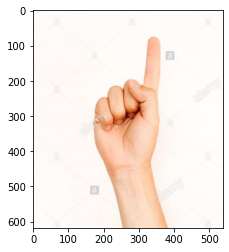

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [21]:
imgload = image.load_img(img_path,color_mode='grayscale',target_size=(64,64))
res = image.img_to_array(imgload)
res.shape

(64, 64, 1)

In [22]:
type(res)

numpy.ndarray

In [23]:
res = np.expand_dims(res,axis=0)

In [24]:
res.shape

(1, 64, 64, 1)

In [25]:
pred_res = np.argmax(test_model.predict(res),axis=-1)
pred_res

1/1 [==============================] - 0s 113ms/step


array([5])

In [26]:
index = ['0','1','2','3','4','5']
final_res = str(index[pred_res[0]])
final_res

'5'